### Cosmology - Problem Sheet 3

#### Drishika Nadella

In [1]:
# Importing the relevant libraries 

import numpy as np
import matplotlib.pyplot as plt
import h5py
import illustris_python as il
import matplotlib as mpl
from scipy.stats import binned_statistic_2d

#### 1.1 

We will load and visualize data corresponding to redshifts z = 0, 1, 5 and 10.

In [2]:
# Define a base path
basePath = "/home/tnguser/sims.TNG/TNG50-4-Dark/output/"

nchunks = 4                  # Number of chunks
snaps = [99, 50, 17, 4]      # Snapshot corresponding to redshift z= 0, 1, 5, 10
hubbles = []                 # Save the Hubble parameters for each redshift here
zs = []                      # Save the redshift values here

# Loading the headers from the groups data
for snap in snaps:
    
    with h5py.File(basePath+'/groups_%03d/fof_subhalo_tab_%03d.%s.hdf5'%(snap,snap,0),'r') as f:

        header=(f['Header'])
        # print(header.attrs.keys(),"\n")

        for key in header.attrs.keys():
            # print(key,header.attrs[key])

            # Save the value of the Hubble parameter from the header
            if key=='HubbleParam':
                hubbles.append(header.attrs[key])
            
            # Save the value of the redshift from the header
            if key=='Redshift':
                zs.append(header.attrs[key])

zs = np.round(zs, 0)
# Printing the Hubble parameters and redshifts
print("Hubble Parameters: ", hubbles)
print("Redshifts: ", zs)

Hubble Parameters:  [0.6774, 0.6774, 0.6774, 0.6774]
Redshifts:  [ 0.  1.  5. 10.]


While loading the data, we perform downscaling by loading the coordinates of every 100th particle, defined by ```scale```.

In [3]:
def load_data(snap, nchunk, scale, h, z):
    
    """
    Function to load the particle positions. Downscaling is performed by loading the coordinates of every 'scale' datapoint.
    
    Inputs:
    ------
    snap:     Snapshot corresponding to a given redshift
    nchunk:   Number of chunks that the data is divided into
    scale:    Factor by which data is downscaled
    h:        Reduced Hubble parameter
    z:        Redshift
    
    Outputs:
    -------
    phys_ppos: Physical particle coordinates at given redshift [Mpc]
    
    """
    
    # Loading particle position of all chunks
    fields = ['Coordinates']
    data = {field: [] for field in fields}

    for num in range(0, nchunks):       

        with h5py.File(basePath+'/snapdir_%03d/snap_%03d.%s.hdf5'%(snap, snap, num),'r') as f:
            for field in fields:           
                data[field].extend(np.array(f['PartType1'][field][::scale]))

    ppos = np.asarray(data['Coordinates'])
    phys_ppos = 1. / (1. + z) * ppos / 1e3 / h  
    return phys_ppos

scale = 100
pos_0 = load_data(snaps[0], nchunks, scale, hubbles[0], zs[0])
pos_1 = load_data(snaps[1], nchunks, scale, hubbles[1], zs[1])
pos_5 = load_data(snaps[2], nchunks, scale, hubbles[2], zs[2])
pos_10 = load_data(snaps[3], nchunks, scale, hubbles[3], zs[3])
print(pos_0.shape)

(196832, 3)


Now, we plot the 2D column densities as done in Exercise 1. The column densities are obtained by weighting the histogram frequences $n$ as $ n \times m_p / r^2$ where $m_p$ is the particle mass and $r$ is the physical bin size. To compensate for the lost mass due to downscaling, we increase the mass of each particle by the scaling factor ```scale```.

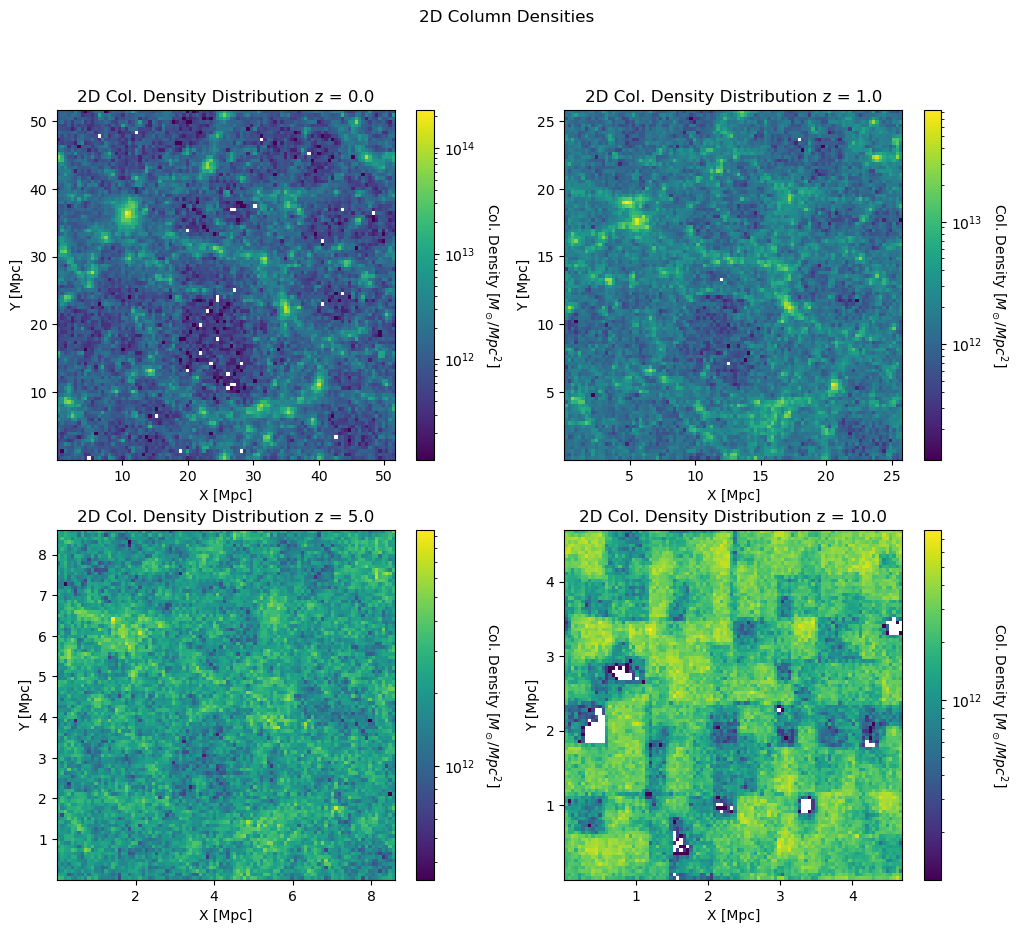

In [4]:
# Plot the 2D column densities

pmass = 1.9e8 / hubbles[0]                                    # Value from the background paper
pmass_scaled = pmass * scale                                  # Adjusting mass because of downscaling
r = 0.5                                                       # Bin size [Mpc]
bins = 100                                                    # Number of bins

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,10))
fig.suptitle('2D Column Densities')

###############################

hist = ax1.hist2d(pos_0[:, 0], pos_0[:, 1], weights = np.tile(pmass_scaled / r**2, len(pos_0[:, 0])), bins = bins, norm=mpl.colors.LogNorm())
ax1.set_xlabel("X [Mpc]")
ax1.set_ylabel("Y [Mpc]")
ax1.set_title(f"2D Col. Density Distribution z = {np.round(zs[0], 0)}")
clb = plt.colorbar(hist[3])
clb.set_label(r'Col. Density $[M_\odot / Mpc^2]$', labelpad=20, rotation=270)

############################### 

hist = ax2.hist2d(pos_1[:, 0], pos_1[:, 1], weights = np.tile(pmass_scaled / r**2, len(pos_1[:, 0])), bins = bins, norm=mpl.colors.LogNorm())
ax2.set_xlabel("X [Mpc]")
ax2.set_ylabel("Y [Mpc]")
ax2.set_title(f"2D Col. Density Distribution z = {np.round(zs[1], 0)}")
clb = plt.colorbar(hist[3])
clb.set_label(r'Col. Density $[M_\odot / Mpc^2]$', labelpad=20, rotation=270)

###############################

hist = ax3.hist2d(pos_5[:, 0], pos_5[:, 1], weights = np.tile(pmass_scaled / r**2, len(pos_5[:, 0])), bins = bins, norm=mpl.colors.LogNorm())
ax3.set_xlabel("X [Mpc]")
ax3.set_ylabel("Y [Mpc]")
ax3.set_title(f"2D Col. Density Distribution z = {np.round(zs[2], 0)}")
clb = plt.colorbar(hist[3])
clb.set_label(r'Col. Density $[M_\odot / Mpc^2]$', labelpad=20, rotation=270)

###############################

hist = ax4.hist2d(pos_10[:, 0], pos_10[:, 1], weights = np.tile(pmass_scaled / r**2, len(pos_10[:, 0])), bins = bins, norm=mpl.colors.LogNorm())
ax4.set_xlabel("X [Mpc]")
ax4.set_ylabel("Y [Mpc]")
ax4.set_title(f"2D Col. Density Distribution z = {np.round(zs[3], 0)}")
clb = plt.colorbar(hist[3])
clb.set_label(r'Col. Density $[M_\odot / Mpc^2]$', labelpad=20, rotation=270)

In line with our expectations, we see that at higher redshifts i.e. earlier times in the Universe's history, the column densities have lower values and a smaller range ($10^{11} - 10^{12} \textrm{ M}_\odot / \textrm{Mpc}^2$ for $z=10$) and at that time, there is also lesser structure formation. The column densities and the density variations steadily increase towards lower redshifts as the Universe has had time to evolve, giving column densities of $10^{12} - 10^{14} \textrm{ M}_\odot / \textrm{Mpc}^2$ for $z=0$.

Now, we calculate the 3D matter density ranges. For this, we divide the data cube of (x, y, z) coordinates into ```divi``` cubes on each side. First, we choose ```divi``` = 10, i.e. 1000 cubes in total. Then, we count up the number of particles in each data cube, multiply by mass and divide by the volume of the cube.

In [5]:
# 3D matter densities: dividing the data cube of simulation box into cubes of L Mpc each

def cube_params(pos, div):   
    
    """
    Calculate the spatial cubes' side lengths and volume
    
    Inputs:
    ------
    pos:      coordinates data of particles
    div:      number of spatial cubes along each side
    
    Outputs:
    -------
    L:        side length of entire simulation box
    cubes:    array of how the simulation box length is divided
    vcube:    volume of each cube
    """
    
    L = np.ceil(pos[:, 0].max())                # Simulation box length [Mpc]
    cubes = np.linspace(0, L, div+1)            # Physical divisions from 0-L Mpc 
    vcube = (L / div)**3                        # Volume of each cube
    
    print(fr'Cube side: {np.round(L / div)} Mpc, Volume: {vcube:.2e} Mpc^3')
    
    return L, cubes, vcube

divi = 10
L0, cubes0, vcube0 = cube_params(pos_0, divi)
L1, cubes1, vcube1 = cube_params(pos_1, divi)
L5, cubes5, vcube5 = cube_params(pos_5, divi)
L10, cubes10, vcube10 = cube_params(pos_10, divi)

Cube side: 5.0 Mpc, Volume: 1.41e+02 Mpc^3
Cube side: 3.0 Mpc, Volume: 1.76e+01 Mpc^3
Cube side: 1.0 Mpc, Volume: 7.29e-01 Mpc^3
Cube side: 0.0 Mpc, Volume: 1.25e-01 Mpc^3


In [6]:
def cube_particles(pos, cube):
    """
    Function to calculate the number of particles in a given cube
    
    Inputs:
    ------
    pos:      coordinates data of particles
    cube:     array of divisions of spatial cubes
    
    Outputs:
    -------
    cube_n:   number of particles in each data cube
    """
    cube_n = []                            # The number of particles in each cube is stored here

    # Loop over every cube in the x, y, and z directions and find and sum only those particles within those cube lengths
    for x in range(len(cube)-1):
        for y in range(len(cube)-1):
            for z in range(len(cube)-1):
                n = sum((pos[:, 0] > cube[x]) & (pos[:, 0] <= cube[x+1]) & (pos[:, 1] > cube[y]) & (pos[:, 1] <= cube[y+1]) & (pos[:, 2] > cube[z]) & (pos[:, 2] <= cube[z+1]))
                cube_n.append(n)
    
    return cube_n

def sanity_checks(rs, cube_n):
    """
    Some print statements to check if everything looks fine
    """
    print("Redshift: ", rs)
    print("Total number of cubes: ", len(cube_n))
    print("Typical number of particles per cube: ", cube_n[:5])
    print("Total number of particles in all cubes: ", sum(cube_n))
    print("\n")

cube_n0 = cube_particles(pos_0, cubes0)
sanity_checks(zs[0], cube_n0)
cube_n1 = cube_particles(pos_1, cubes1)
sanity_checks(zs[1], cube_n1)
cube_n5 = cube_particles(pos_5, cubes5)
sanity_checks(zs[2], cube_n5)
cube_n10 = cube_particles(pos_10, cubes10)
sanity_checks(zs[3], cube_n10)

Redshift:  0.0
Total number of cubes:  1000
Typical number of particles per cube:  [140, 168, 59, 82, 72]
Total number of particles in all cubes:  196832


Redshift:  1.0
Total number of cubes:  1000
Typical number of particles per cube:  [168, 204, 79, 108, 110]
Total number of particles in all cubes:  196832


Redshift:  5.0
Total number of cubes:  1000
Typical number of particles per cube:  [173, 185, 199, 144, 195]
Total number of particles in all cubes:  196833


Redshift:  10.0
Total number of cubes:  1000
Typical number of particles per cube:  [65, 231, 100, 0, 89]
Total number of particles in all cubes:  196833




As expected, with 10 divisions on each side of size ~ $\textrm{L Mpc}$ each, we get 1000 cubes in total, and typical number of particles for each cube are of $10^2 - 10^3$. As a sanity check, we check if all the particles are accounted for. Now we calculate the matter densities as:

$$ \rho = n \times m_p / v_{cube} $$

In [7]:
def matter_dens_cube(cube_nz, mp, v):
    """
    Calculate the matter density for each cube 
    
    Inputs:
    ------
    cube_nz:    list of number of particles in each cube at some redshift
    mp:         scaled particle mass
    v:          cube volume
    
    Outputs:
    -------
    rho_nz:     matter density in each cube at some redshift
    
    """
    rho_nz = np.asarray(cube_nz) * mp / v
    return rho_nz

rho_n0 = matter_dens_cube(cube_n0, pmass_scaled, vcube0)
rho_n1 = matter_dens_cube(cube_n1, pmass_scaled, vcube1)
rho_n5 = matter_dens_cube(cube_n5, pmass_scaled, vcube5)
rho_n10 = matter_dens_cube(cube_n10, pmass_scaled, vcube10)

print(f'At redshift z = {zs[0]}, matter density ranged between {rho_n0.min():.1e} to {rho_n0.max():.1e} Msun / Mpc^3')
print(f'At redshift z = {zs[1]}, matter density ranged between {rho_n1.min():.1e} to {rho_n1.max():.1e} Msun / Mpc^3')
print(f'At redshift z = {zs[2]}, matter density ranged between {rho_n5.min():.1e} to {rho_n5.max():.1e} Msun / Mpc^3')
print(f'At redshift z = {zs[3]}, matter density ranged between {rho_n10.min():.1e} to {rho_n10.max():.1e} Msun / Mpc^3')

At redshift z = 0.0, matter density ranged between 1.6e+09 to 9.2e+11 Msun / Mpc^3
At redshift z = 1.0, matter density ranged between 2.4e+10 to 4.8e+12 Msun / Mpc^3
At redshift z = 5.0, matter density ranged between 6.2e+11 to 2.3e+13 Msun / Mpc^3
At redshift z = 10.0, matter density ranged between 0.0e+00 to 2.3e+14 Msun / Mpc^3


Since at earlier times i.e. larger redshifts, the simulation volume would have been smaller, we see higher matter densities are larger redshifts. We do see that the minimum density at $z=10$ is $0 \textrm{ M}_\odot / \textrm{Mpc}^3$. This is probably because there are some patches with no particles in their cubes at $z=10$. This can be seen as the white regions in the column density maps.

We now calculate the average matter densities at a given redshift as:

$$ \bar{\rho} = \sum{n} \times m_p / v_{tot} $$

where $v_{tot}$ is the total simulation volume as defined by the box of length ```L``` above. Since the total number of particles are similar and the box size gets smaller with higher redshifts, we expect to have increasing average densities with increasing redshifts.

In [8]:
def matter_dens_avg(cube_nz, mp, L):
    
    """
    Calculates the average matter density across the entire simulation box
    
    Inputs:
    ------
    cube_nz:    list of number of particles in each cube at some redshift
    mp:         scaled particle mass
    L:          simulation box length
    
    Outputs:
    -------
    rho_avg:    average matter density in the simulation box (float)
    """
    
    Vtot = L**3
    rho_avg = sum(cube_nz) * mp / Vtot
    return rho_avg

rho_avg_n0 = matter_dens_avg(cube_n0, pmass_scaled, L0)
rho_avg_n1 = matter_dens_avg(cube_n1, pmass_scaled, L1)
rho_avg_n5 = matter_dens_avg(cube_n5, pmass_scaled, L5)
rho_avg_n10 = matter_dens_avg(cube_n10, pmass_scaled, L10)

print(f'At redshift z = {zs[0]}, the average matter density is {rho_avg_n0:.1e} Msun / Mpc^3')
print(f'At redshift z = {zs[1]}, the average matter density is {rho_avg_n1:.1e} Msun / Mpc^3')
print(f'At redshift z = {zs[2]}, the average matter density is {rho_avg_n5:.1e} Msun / Mpc^3')
print(f'At redshift z = {zs[3]}, the average matter density is {rho_avg_n10:.1e} Msun / Mpc^3')

At redshift z = 0.0, the average matter density is 3.9e+10 Msun / Mpc^3
At redshift z = 1.0, the average matter density is 3.1e+11 Msun / Mpc^3
At redshift z = 5.0, the average matter density is 7.6e+12 Msun / Mpc^3
At redshift z = 10.0, the average matter density is 4.4e+13 Msun / Mpc^3


As expected, the average densities increase with increasing redshifts.

#### 1.2

To now calculate the density contrast, we use the following formula:

$$ \delta = \frac{\rho - \bar{\rho}}{\bar{\rho}}$$

In [9]:
def density_contrast(rho, rho_avg):
    """
    Find the density contrast of the spatial field given by above formula
    
    Inputs:
    ------
    rho:       matter density in each spatial cube
    rho_avg:   average matter density across simulation box
    
    Outputs:
    -------
    delta:     array of density contrasts in each spatial cube
    """
    
    delta = (rho - rho_avg) / rho_avg
    return delta

delta_0 = density_contrast(rho_n0, rho_avg_n0)
delta_1 = density_contrast(rho_n1, rho_avg_n1)
delta_5 = density_contrast(rho_n5, rho_avg_n5)
delta_10 = density_contrast(rho_n10, rho_avg_n10)

We can plot a histogram of the density contrasts

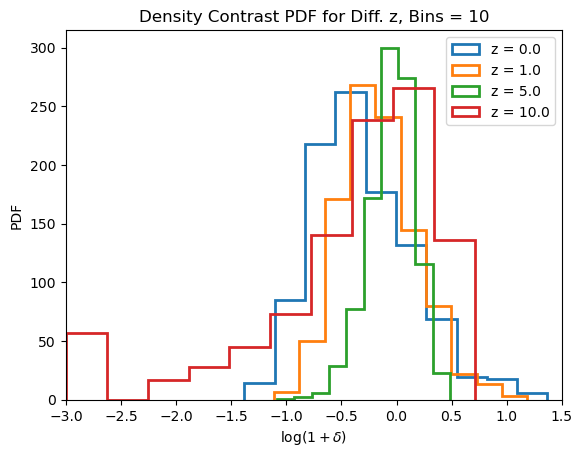

In [10]:
def plot_PDF(d0, d1, d5, d10, L0, L1, L5, L10, zs, div):
    """
    Plot the PDF histogram for density contrasts at different redshifts
    
    Inputs:
    ------
    d0, d1, d5, d10:   density contrast arrays at z=0,1,5,10
    L0, L1, L5, L10:   simulation box lengths at different redshifts
    zs:                array of redshifts
    div:               number of spatial cubes
    """

    dplot0 = np.log10(1.001 + d0)           # Adding a 0.001 to avoid computational problems
    dplot1 = np.log10(1.001 + d1)
    dplot5 = np.log10(1.001 + d5)
    dplot10 = np.log10(1.001 + d10)
    
    h0 = plt.hist(dplot0, label = f'z = {zs[0]}', histtype='step', linewidth=2, density=False)
    h1 = plt.hist(dplot1, label = f'z = {zs[1]}', histtype='step', linewidth=2, density=False)
    h5 = plt.hist(dplot5, label = f'z = {zs[2]}', histtype='step', linewidth=2, density=False)
    h10 = plt.hist(dplot10, label = f'z = {zs[3]}', histtype='step', linewidth=2, density=False)
    plt.xlabel(r'$\log(1 + \delta)$')
    plt.ylabel("PDF")
    plt.xlim(-3, 1.5)
    plt.title(f'Density Contrast PDF for Diff. z, Bins = {div}')
    plt.legend()    
    plt.show()
    
plot_PDF(delta_0, delta_1, delta_5, delta_10, L0, L1, L5, L10, zs, divi)

Let us first look at the $z=0$ PDF. The probability distribution of the density contrast is Gaussian. It is not symmetric, with a marked extended tail in the overdense region. Here, the maximum density contrast seems to be around $\log(1+\delta) = 1.5$, which corresponds to $\delta = 31$.

#### 1.3

How does the PDF of density contrast change with respect to redshift?

One would expect that the density contrasts increase with decreasing redshift. However, that is not the trend I see. 

* **PDF peak**: The PDF peak increases with increasing redshift, indicating that higher density contrasts are more frequent with increasing redshift. I believe I must have made a mistake in my calculation, although I am not sure where I am going wrong. But the expected curve would be that the PDF peak moves to the right with decreasing redshift.

* **PDF shape**: At all redshifts, the PDF has a roughly Gaussian shape, as predicted from theory. But let us consider the asymmetries. At $z=10$, there is a high incidence of underdense regions, causing the shape to be asymmetric with a long tail to the left. This adds up with our expectations of finding more underdensities earlier in the Universe. As the redshift decreases, this underdensity tail decreases and at $z=5$ and $z=1$, the PDF looks more symmetric. At $z=0$, we again see an asymmetry, this time with a long tail to the right, indicating more overdense regions, which is also expected from theory.

Now trying over different spatial cube sizes. Let us consider 10, 20 and 50 divisions, which admittedly are still relatively low number of divisions, but because of how expensive the computations are, only these divisions take reasonable time. So, we perform the same procedure over each spatial scale.

Cube side: 5.0 Mpc, Volume: 1.41e+02 Mpc^3
Cube side: 3.0 Mpc, Volume: 1.76e+01 Mpc^3
Cube side: 1.0 Mpc, Volume: 7.29e-01 Mpc^3
Cube side: 0.0 Mpc, Volume: 1.25e-01 Mpc^3


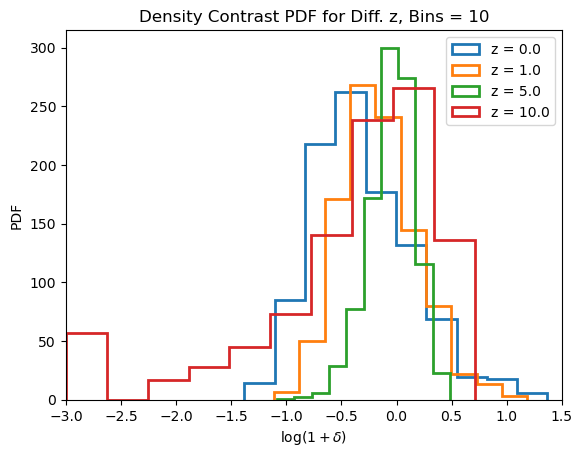

Cube side: 3.0 Mpc, Volume: 1.76e+01 Mpc^3
Cube side: 1.0 Mpc, Volume: 2.20e+00 Mpc^3
Cube side: 0.0 Mpc, Volume: 9.11e-02 Mpc^3
Cube side: 0.0 Mpc, Volume: 1.56e-02 Mpc^3


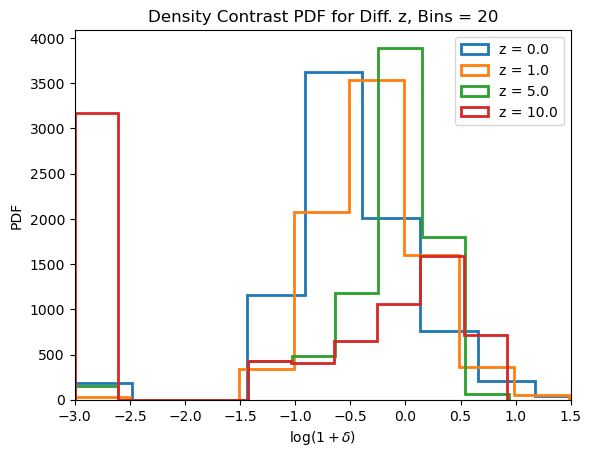

Cube side: 1.0 Mpc, Volume: 1.12e+00 Mpc^3
Cube side: 1.0 Mpc, Volume: 1.41e-01 Mpc^3
Cube side: 0.0 Mpc, Volume: 5.83e-03 Mpc^3
Cube side: 0.0 Mpc, Volume: 1.00e-03 Mpc^3


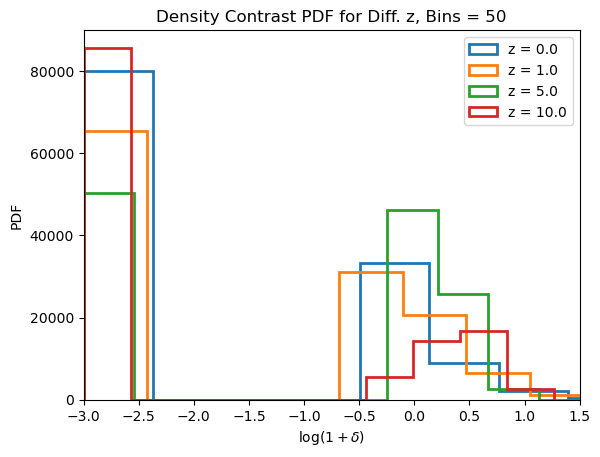

In [11]:
divs = [10, 20, 50]                                  # Number of divisions

for d in divs:
    
    L0, cubes0, vcube0 = cube_params(pos_0, d)
    L1, cubes1, vcube1 = cube_params(pos_1, d)
    L5, cubes5, vcube5 = cube_params(pos_5, d)
    L10, cubes10, vcube10 = cube_params(pos_10, d)
    
    cube_n0 = cube_particles(pos_0, cubes0)
    cube_n1 = cube_particles(pos_1, cubes1)
    cube_n5 = cube_particles(pos_5, cubes5)
    cube_n10 = cube_particles(pos_10, cubes10)
    
    rho_n0 = matter_dens_cube(cube_n0, pmass_scaled, vcube0)
    rho_n1 = matter_dens_cube(cube_n1, pmass_scaled, vcube1)
    rho_n5 = matter_dens_cube(cube_n5, pmass_scaled, vcube5)
    rho_n10 = matter_dens_cube(cube_n10, pmass_scaled, vcube10)
    
    rho_avg_n0 = matter_dens_avg(cube_n0, pmass_scaled, L0)
    rho_avg_n1 = matter_dens_avg(cube_n1, pmass_scaled, L1)
    rho_avg_n5 = matter_dens_avg(cube_n5, pmass_scaled, L5)
    rho_avg_n10 = matter_dens_avg(cube_n10, pmass_scaled, L10)
    
    delta_0 = density_contrast(rho_n0, rho_avg_n0)
    delta_1 = density_contrast(rho_n1, rho_avg_n1)
    delta_5 = density_contrast(rho_n5, rho_avg_n5)
    delta_10 = density_contrast(rho_n10, rho_avg_n10)
    
    plot_PDF(delta_0, delta_1, delta_5, delta_10, L0, L1, L5, L10, zs, d)

By increasing the number of bins, we can make the following observations:

* There is a greater frequency of highly underdense regions at all redshifts. This is likely because, since we increase the number of bins, the individual cube sizes are smaller, and since we downscaled our data, many of the data points are missing and therefore, some of these small cubes do not have many DM particles, causing the cube to be underdense.

* The number of highly overdense regions also increase a little bit, again because of the smaller cube size which better captures density contrasts.

#### 2

Given that a typical galaxy mass is $M_{gal} = 10^{15} M_\odot$, and its radius $R$ (assuming that it is spherically shaped) is $2 \textrm{ Mpc}$, the density of such a galaxy $\rho_{gal}$ is calculated as:

$$ \rho_{gal} = \frac{M_{gal}}{\frac{4}{3}\pi R^3} $$

This gives an overdensity value of $2.98 \times 10^{13} M_\odot\textrm{/Mpc}^3$. We can obtain the mean density calculated as $\bar{\rho} = 0.315\rho_c$ according to the LCDM model with $\rho_c = 8.43 \times 10^{-27} \textrm{kg/m}^3 = 1.36 \times 10^{11} M_\odot\textrm{/Mpc}^3$ (from Lecture 2b_1), giving a value of $\bar{\rho} = 4.31 \times 10^{11} M_\odot\textrm{/Mpc}^3$. 

Therefore, the density contrast $\delta$ is calculated as 

$$ \delta = \frac{\rho_{gal} - \bar{\rho}}{\bar{\rho}}$$

giving a density contrast value of $\delta = 68.14$. This corresponds to a value of $\log(1+\delta) = 1.83$, which when compared to the $z=0$ curve in the above plot, we see that such an overdensity is extremely rare.

#### 3.1

In [12]:
haloID = 0
parttype = 1
dm_fields = ['Coordinates']
snap = 99
Coordinates = il.snapshot.loadHalo(basePath, snap, haloID, parttype, fields=dm_fields)  # Load the coordinates
coords = 1. / (1. + zs[0]) * Coordinates / 1e3 / hubbles[0]                             # Convert them to physical coordinates

fields = ['Group_M_Crit200','Group_R_Crit200', 'GroupPos']
data = {field: [] for field in fields}

for num in range(0, nchunks):           
    with h5py.File(basePath+'/groups_%03d/fof_subhalo_tab_%03d.%s.hdf5'%(snap,snap,num),'r') as f:
        
        header=(f['Header'])
        for key in header.attrs.keys():   
            
            # Save the value of the Box size from the header
            if key=='BoxSize':
                bx = header.attrs[key]
                
        for field in fields:           
            data[field].extend(np.array(f['Group'][field][:]))

Mc200 = np.asarray(data['Group_M_Crit200'])
Rc200 = np.asarray(data['Group_R_Crit200'])
centers = np.asarray(data['GroupPos'])

In [13]:
# Convert radius and mass values to physical values
Rc200 = 1. / (1. + zs[0]) * Rc200 / 1e3 / hubbles[0]      # Mpc
centers = 1. / (1. + zs[0]) * centers / 1e3 / hubbles[0]  # Mpc
Mc200 = Mc200 * 1e10 / hubbles[0]                         # Msun
bx = 1. / (1. + zs[0]) * bx / 1e3 / hubbles[0]            # Mpc
print(Rc200.shape, Mc200.shape, centers.shape)

(18824,) (18824,) (18824, 3)


In [14]:
# Take the appropriate values for a given Halo ID

def halo_params(haloID, Rc, Mc, cen):
    """
    Obtain the Rc200, Mc200 and halo center positions for a given halo ID and construct a radial array
    
    Inputs:
    ------
    haloID:    halo index
    Rc:        arrays of physical Rc200 [Mpc]
    Mc:        arrays of physical Mc200 [Msun]
    c0:        arrays of group positions (central points of halos)
    
    Outputs:
    -------
    Rc0, Mc0, c0:  critical radius, critical mass and halo group position corresponding to given halo ID
    r:             array of logarithmically spaced radii
    """
    
    # Obtain the right halo
    Rc0 = Rc[haloID]
    Mc0 = Mc[haloID]
    c0 = cen[haloID]
    
    r_min = 0.03 * Rc0
    r_max = Rc0
    nbin = 20
    r = np.logspace(np.log10(r_min), np.log10(r_max), nbin)      # Mpc
    
    return Rc0, Mc0, c0, r

#### 4

The growth factor $D_+$ for any cosmological model is given by the Carroll et al. (1992) fitting formula as below:

$$ D_+(z) = \frac{1}{1+z} \frac{g(z)}{g(0)}$$ 

where $g(z)$ is given as:

$$ g(z) = \frac{5}{2} \frac{\Omega_m(z)}{\Omega^{4/7}_m(z) - \Omega_\Lambda(z) + \left(1 + \frac{\Omega_m(z)}{2}\right)\left(1 + \frac{\Omega_\Lambda(z)}{70}\right)}$$

Let us define some basic cosmological models:

In [15]:
# Define cosmological parameters for the Einstein-de Sitter Universe
EdS = {'H0': 67.3, 'Om': 1., 'Ol': 0., 'Or': 0., 'k': 0.} 

# Define cosmological parameters the de Sitter Universe
LowM = {'H0': 67.3, 'Om': 0.3, 'Ol': 0., 'Or': 0., 'k': 0.}

# Define cosmological parameters the de Sitter Universe
LCDM = {'H0': 67.3, 'Om': 0.315, 'Ol': 0.685, 'Or': 2.47 * 1.e-5 / 0.67**2, 'k': 0.}

To calculate $g(z)$ at a specific redshift $z$, we need to find the cosmological density parameters at that particular redshift. For this, I borrow the same function I used in Exercise 2.

In [16]:
def density_param(z, OM0, OR0, OL0):
    
    """
    Calculates the density parameter at a certain redshift for a given cosmological model
    
    Inputs:
    ------
    z:       Redshift
    OM0:     Present day matter density parameter
    OR0:     Present day radiation density parameter
    OL0:     Present day dark energy density parameter   
    
    Outputs:
    -------
    OMt, ORt, OLt:       Matter, radiation and dark energy density parameters at a given epoch
    """
    
    Ez2 = ((1. + z)**4. * OR0 + (1. + z)**3. * OM0 + (1 + z)**2. * (1. - OM0 - OR0 - OL0) + OL0)
    OMt = OM0 * (1. + z)**3. / Ez2
    ORt = OR0 * (1. + z)**4. / Ez2
    OLt = OL0 / Ez2
    
    return OMt, ORt, OLt

Now, let us calculate $g(z)$:

In [17]:
def g_z(z, Omz, Olz):
    
    """
    Calculates g(z) at a given redshift for a given cosmological model
    
    Inputs:
    ------
    z:        Redshift
    Omz:      Matter density parameter at given redshift z
    Olz:      Dark energy density parameter at given redshift z
    
    Outputs:
    -------
    gz:       g(z) at given redshift
    """
    
    gz = 2.5 * Omz / (Omz**(4./7.) - Olz + (1. + Omz / 2.) * (1. + Olz / 70.))
    return gz

Now, the growth factor $D_+(z)$:

In [18]:
def growth_factor(z, Om, Or, Ol):
    
    """
    Calculates the growth factor for a certain cosmological model and redshift
    
    Inputs:
    ------
    z:       Redshift
    Om:      Present day matter density parameter
    Or:      Present day radiation density parameter
    Ol:      Present day dark energy density parameter
    
    Outputs:
    -------
    dplus:   Growth factor for a given redshift and cosmological model using the Carroll1992 fitting formula
    """
    
    Omz, _, Olz = density_param(z, Om, Or, Ol)
    gz = g_z(z, Omz, Olz)            # Using parameter values at z=z for g(z)
    g0 = g_z(0, Om, Ol)              # Using parameter values at z=0 for g(0)
    dplus = 1. / (1. + z) * gz / g0
    return dplus

In [19]:
z_array = np.linspace(0, 5, 500)

# Calculating D+ vs z for the Einstein-de Sitter model
dplus_EdS = growth_factor(z_array, EdS['Om'], EdS['Or'], EdS['Ol'])

# Calculating D+ vs z for the low matter density model
dplus_lowM = growth_factor(z_array, LowM['Om'], LowM['Or'], LowM['Ol'])

# Calculating D+ vs z for the LCDM model
dplus_LCDM = growth_factor(z_array, LCDM['Om'], LCDM['Or'], LCDM['Ol'])

Now, plotting the evolution of the growth factor with redshift:

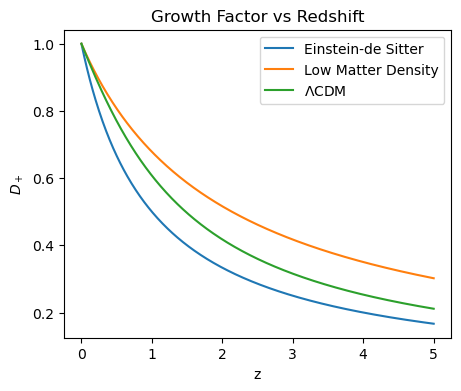

In [20]:
plt.figure(figsize=(5, 4))

plt.plot(z_array, dplus_EdS, label='Einstein-de Sitter', linewidth=1.5)
plt.plot(z_array, dplus_lowM, label='Low Matter Density', linewidth=1.5)
plt.plot(z_array, dplus_LCDM, label=r'$\Lambda$CDM', linewidth=1.5)
plt.xlabel('z')
plt.ylabel(r'$D_+$')
# plt.xscale('log')
# plt.yscale('log')
plt.title("Growth Factor vs Redshift")
plt.legend()
plt.show()

We can see that the growth factor decreases with increasing redshift. Since the growth factor is a measure of the evolution of density fluctuations over time, it makes sense that it increases with time i.e. decreases with redshift as the Universe evolves forming more structures over time.

Furthermore, we see in the Einstein-de Sitter model, the growth factor evolution is proportional to the scale factor.